# Question 1

In [ ]:
### Import libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
### Import the dataset and assign it to a variable called users

In [4]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')

In [6]:
print(users.head())

   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


In [7]:
### mean age per occupation

In [24]:
print("Mean age per occupation")
users.groupby('occupation').age.mean()

Mean age per occupation


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [9]:
### Male ratio per occupation and sort it from the most to the least

In [12]:
occupation_male_ratio = users[users['gender'] == 'M'].groupby('occupation')['gender'].count() / users.groupby('occupation')['gender'].count()
occupation_male_ratio = occupation_male_ratio.sort_values(ascending=False)

# Display the result
print(occupation_male_ratio)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


In [13]:
### For each occupation, calculate the minimum and maximum ages

In [16]:
print("Minimum age for each occupation ")
print(users.groupby('occupation').age.min())
print("\n Maximum age for each occupation ")
print(users.groupby('occupation').age.max())

Minimum age for each occupation 
occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64

 Maximum age for each occupation 
occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64


In [17]:
### For each combination of occupation and sex, calculate the mean age 

In [25]:
print("Mean age for the combination of age and sex")
users.groupby(['occupation', 'gender']).age.mean()

Mean age for the combination of age and sex


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [19]:
### For each occupation present the percentage of women and men

In [21]:
# Calculate total count per occupation
occupation_count = users.groupby('occupation')['gender'].count()

# Calculate male and female count per occupation
occupation_gender_count = users.groupby(['occupation', 'gender'])['gender'].count()

# Calculate percentage of women and men per occupation
occupation_gender_percentage = (occupation_gender_count / occupation_count) * 100

# Display the result
print(occupation_gender_percentage)

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2

In [26]:
### Import the dataset and assign it to a variable called euro12.

In [29]:
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")

euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [30]:
### Goal column

In [31]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [32]:
### How many team participated in the Euro2012

In [33]:
print(f"Team Participated : {euro12.shape[0]}")

Team Participated : 16


In [34]:
### What is the number of columns in the dataset?

In [35]:
euro12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [36]:
### View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [37]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [38]:
### Sort the teams by Red Cards, then to Yellow Cards 

In [39]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [40]:
### Calculate the mean Yellow Cards given per Team

In [44]:
mean_card=round(discipline['Yellow Cards'].mean())
print(f"Mean Yellow Cards given per Team: {mean_card}")

Mean Yellow Cards given per Team: 7


In [45]:
### Filter teams that scored more than 6 goals

In [47]:
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [48]:
### Select the teams that start with G

In [49]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [50]:
### Select the first 7 columns

In [51]:
euro12.iloc[: , 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [52]:
###  Select all columns except the last 3

In [53]:
euro12.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [54]:
### Present only the Shooting Accuracy from England, Italy and Russia

In [55]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [362]:
### Three different series

In [66]:
first_series = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
second_series = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
third_series = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print(f"First_series:\n{first_series}, \nSecond_series:\n {second_series}, \nThird_series: \n {third_series}")

First_series:
0     3
1     2
2     1
3     4
4     1
     ..
95    1
96    4
97    3
98    1
99    2
Length: 100, dtype: int32, 
Second_series:
 0     3
1     3
2     3
3     1
4     1
     ..
95    1
96    2
97    2
98    1
99    2
Length: 100, dtype: int32, 
Third_series: 
 0     15198
1     23517
2     10639
3     22723
4     20052
      ...  
95    17977
96    15173
97    20423
98    12868
99    17211
Length: 100, dtype: int32


In [67]:
###  Create a DataFrame by joinning the Series by column

In [69]:
house_concat = pd.concat([first_series, second_series, third_series], axis=1)
house_concat.head()

,0,1,2
0,3,3,15198
1,2,3,23517
2,1,3,10639
3,4,1,22723
4,1,1,20052


In [70]:
### Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [71]:
house_concat.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
house_concat.head()

,bedrs,bathrs,price_sqr_meter
0,3,3,15198
1,2,3,23517
2,1,3,10639
3,4,1,22723
4,1,1,20052


In [72]:
### Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [73]:
bigcolumn = pd.concat([first_series, second_series, third_series], axis=0)

#convert to  DataFrame
bigcolumn = bigcolumn.to_frame()
bigcolumn

,0
0,3
1,2
2,1
3,4
4,1
...,...
95,17977
96,15173
97,20423
98,12868


In [74]:
### Ops it seems it is going only until index 99. Is it true?

In [75]:
# no length of bigcoloumn is 300
len(bigcolumn)

300

In [76]:
# Reindex the DataFrame so it goes from 0 to 299

In [77]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,3
1,2
2,1
3,4
4,1
...,...
295,17977
296,15173
297,20423
298,12868


# Question 4

In [129]:
### Datetime Library
import datetime

In [130]:
### Import the dataset and assign it to a variable called data.

In [131]:
text_data = 'wind.txt'
data = pd.read_csv(text_data, sep = "\s+", parse_dates = [[0,1,2]]) 
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [132]:
### Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [133]:
# There is an issue with year in the given data(2061)...

# Function to fix the year
def fix_year(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

# Apply the function to the 'Yr_Mo_Dy' column
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_year)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [134]:
###Qn. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [135]:
# transform to datetime64 datset
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

# set 'Yr_Mo_Dy' as index
data = data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [136]:
### Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [138]:
# total missing values
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [139]:
### Compute how many non-missing values there are in total.

In [141]:
print("Total non-missing values")
data.notnull().sum()

Total non-missing values


RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [142]:
### Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [143]:
mean_windspeeds=data.sum().sum() / data.notna().sum().sum()
print(f" Mean windspeeds: {mean_windspeeds} ")

 Mean windspeeds: 10.227883764282181 


In [144]:
### Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all thedays


In [145]:
data.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [146]:
# Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at eachday.


In [147]:
# create dataframe
day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [148]:
# Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [151]:
print("Average windspeed in January for each location")
data.loc[data.index.month == 1].mean()

Average windspeed in January for each location


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [152]:
# Downsample the record to a yearly frequency for each location

In [155]:
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [156]:
# Downsample the record to a monthly frequency for each location. 

In [157]:
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [158]:
# Downsample the record to a weekly frequency for each location.

In [159]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [161]:
# Calculate the min, max and mean windspeeds and standard deviations of the windspeeds

In [163]:
# resample data to 'W' week
weekly_data = data.resample('W').agg(['min','max','mean','std'])

# first 52 weeks and locations
weekly_data.loc[weekly_data.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

# Question 5

In [290]:
### Import the dataset and assign it to a variable called chipo.

In [291]:
chipo  = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep = '\t')

chipo .head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [292]:
#  First 10 entries

In [293]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [294]:
#Number of observations in the dataset

In [295]:
observations= chipo.shape[0]
print(f"Number of observation in the dataset: {observations}")

Number of observation in the dataset: 4622


In [296]:
#Number of columns in the dataset

In [297]:
col=chipo.shape[1]
print(f"Number of columns in the dataset: {col}")

Number of columns in the dataset: 5


In [298]:
#  Print the name of all the columns.

In [299]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [300]:
#How is the dataset indexed?

In [301]:
# dataset is indexed by calling index method
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [302]:
# Which was the most-ordered item?

In [303]:
# Create a DataFrame
df = pd.DataFrame(chipo)

# Group data by 'item_name' and sum the 'quantity'
item_quantity = df.groupby('item_name')['quantity'].sum()

# Find the most-ordered item
most_ordered_item = item_quantity.idxmax()

# Display the most-ordered item
print("The most-ordered item:", most_ordered_item)

The most-ordered item: Chicken Bowl


In [304]:
#For the most-ordered item, how many items were ordered?

In [305]:
# Group data by 'item_name' and sum the 'quantity'
item_quantity = df.groupby('item_name')['quantity'].sum()

# Find the most-ordered item
most_ordered_item = item_quantity.idxmax()

# Find the quantity of the most-ordered item
quantity_ordered = item_quantity.max()

# Display the result
print(f"The most-ordered item '{most_ordered_item}' was ordered {quantity_ordered} times.")

The most-ordered item 'Chicken Bowl' was ordered 761 times.


In [306]:
#  What was the most ordered item in the choice_description column?

In [307]:
# Group data by 'choice_description' and sum the 'quantity'
description_quantity = df.groupby('choice_description')['quantity'].sum()

# Find the most-ordered description
most_ordered_description = description_quantity.idxmax()
print("The most-ordered description:", most_ordered_description)

The most-ordered description: [Diet Coke]


In [308]:
# How many items were orderd in total?

In [309]:
# Calculate the total number of items ordered
total_items_ordered = df['quantity'].sum()
print("Total items ordered:", total_items_ordered)

Total items ordered: 4972


In [331]:
# Turn the item price into a float
# Check the item price type

In [311]:
chipo.item_price.dtype

dtype('O')

In [312]:
# Create a lambda function and change the type of item price

In [313]:
to_float = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(to_float)

In [314]:
# Check the item price type

In [315]:
chipo.item_price.dtype

dtype('float64')

In [316]:
# How much was the revenue for the period in the dataset?

In [317]:
revenue = (chipo['quantity']* chipo['item_price']).sum()
print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


In [318]:
# How many orders were made in the period?

In [319]:
total_orders = chipo.order_id.value_counts().count()
print(f'Total orders: {total_orders}')

Total orders: 1834


In [320]:
# What is the average revenue amount per order? 

In [327]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
avg_revenue = chipo.groupby(by=['order_id']).sum()
avg_revenue.mean()['revenue']

C:\Users\abith\AppData\Local\Temp\ipykernel_1580\3011817618.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_revenue = chipo.groupby(by=['order_id']).sum()


21.39423118865867

In [328]:
# How many different items are sold?

In [330]:
differnt_item= chipo.item_name.value_counts().count()
print(f'Total different items  sold: {differnt_item}')

Total different items  sold: 50


# Question 6

In [332]:
# import library
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

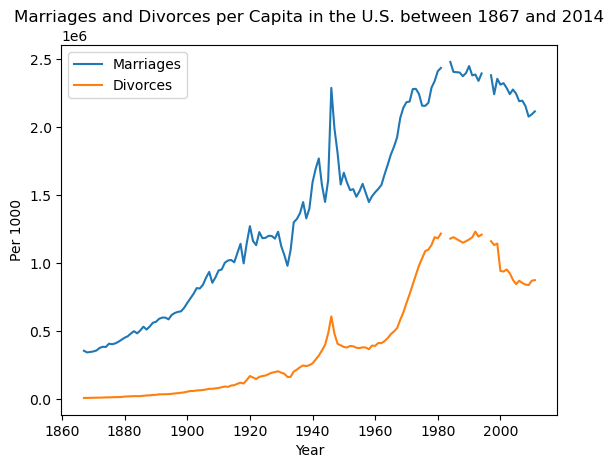

In [341]:
data=pd.read_csv('us-marriages-divorces-1867-2014.csv')
plt.figure()
data.plot('Year',y=['Marriages','Divorces'])
plt.ylabel('Per 1000')
plt.title('Marriages and Divorces per Capita in the U.S. between 1867 and 2014')
plt.show()


# Question 7

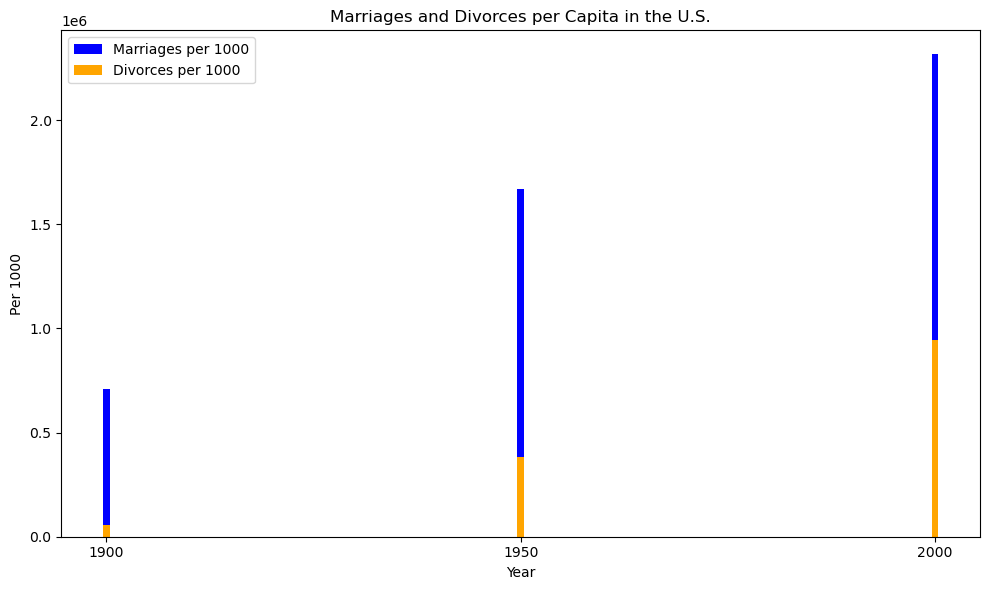

In [343]:
# Create a DataFrame
df = pd.DataFrame(data)

# Filter data for the years 1900, 1950, and 2000
years = [1900, 1950, 2000]
filtered_data = df[df['Year'].isin(years)]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(filtered_data['Year'], filtered_data['Marriages'], color='blue', label='Marriages per 1000')
plt.bar(filtered_data['Year'], filtered_data['Divorces'], color='orange', label='Divorces per 1000')
plt.xlabel('Year')
plt.ylabel('Per 1000')
plt.title('Marriages and Divorces per Capita in the U.S.')
plt.legend()
plt.xticks(years)
plt.tight_layout()

plt.show()

# Question 8

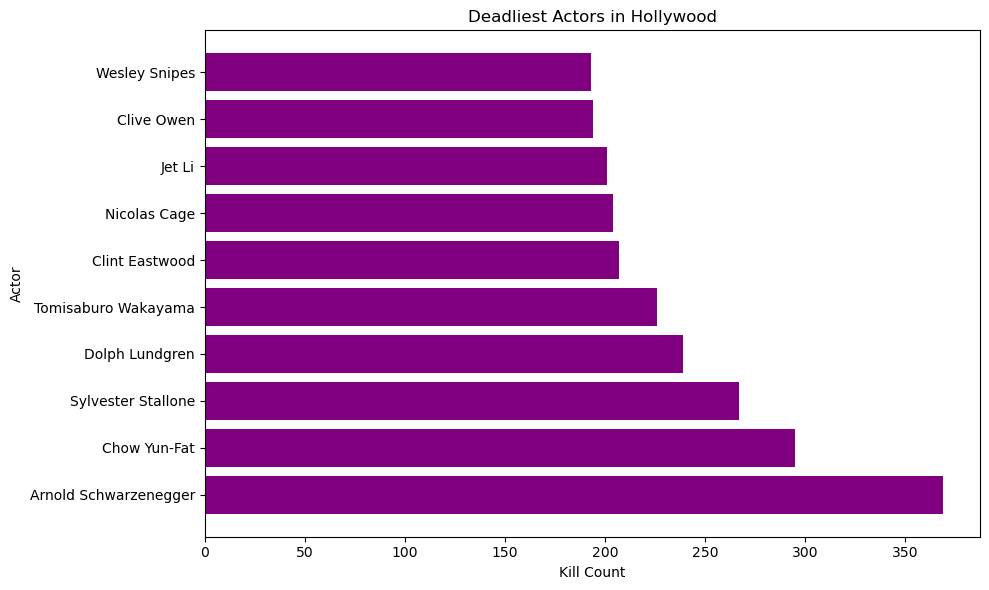

In [346]:
kill_data=pd.read_csv('actor_kill_counts.csv')

# Create a DataFrame
df = pd.DataFrame(kill_data)

# Sort the DataFrame by 'Count' in descending order
df = df.sort_values(by='Count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(df['Actor'], df['Count'], color='purple')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.tight_layout()

# Display the plot
plt.show()

# Question 9

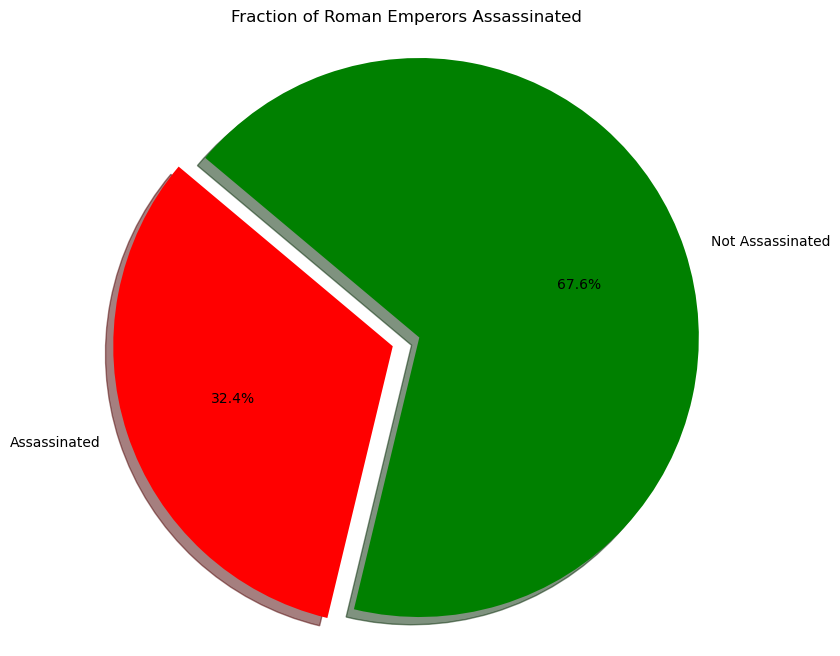

In [350]:
emperor_data=pd.read_csv('roman-emperor-reigns.csv')

# Create a DataFrame
df = pd.DataFrame(emperor_data)

# Count the number of emperors who were assassinated
assassinated_count = df[df['Cause_of_Death'] == 'Assassinated'].shape[0]

# Count the number of emperors who were not assassinated
non_assassinated_count = df.shape[0] - assassinated_count

# Create a pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_count, non_assassinated_count]
colors = ['red', 'green']
explode = (0.1, 0)  # explode the 'Assassinated' slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Fraction of Roman Emperors Assassinated')
plt.show()

# Question 10

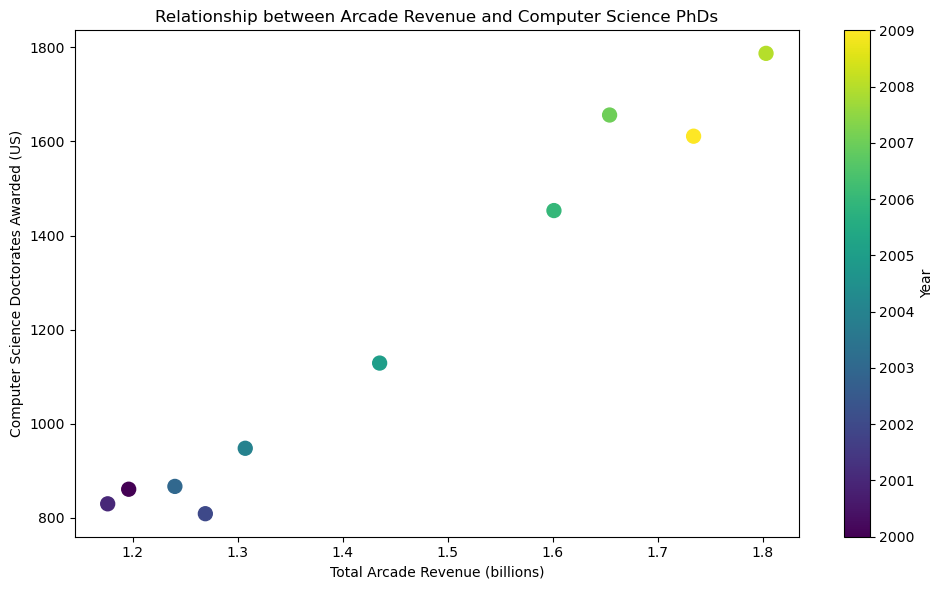

In [361]:
arcade_data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Create a DataFrame
df = pd.DataFrame(arcade_data)

# Plotting
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['Total Arcade Revenue (billions)'], df['Computer Science Doctorates Awarded (US)'], c=df['Year'], cmap='viridis', s=100)
plt.colorbar(sc, label='Year')
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and Computer Science PhDs')
plt.tight_layout()

# Display the plot
plt.show()